# <u>🥑 Project Overview: Avocado Price Prediction using AR Model</u>
This project focuses on analyzing and predicting avocado prices in the US using time series modeling. The dataset contains historical data from 2015 to 2020, including average_price of avocados across different dates and regions.

We will focus on the average_price column and apply AutoRegressive (AR) models to forecast future avocado prices. The time series will be tested for stationarity, visualized, and used to build a predictive model that captures temporal trends.

https://www.kaggle.com/datasets/timmate/avocado-prices-2020

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [114]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (5)\avocado-updated-2020.csv")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [ ]:
# on this dataset we will analyze and predict the average_price of
# avacodo based on the time

In [85]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\Acer\Downloads\archive (5)\avocado-updated-2020.csv",
    usecols=['date', 'average_price'],          # Sirf 2 columns load karo
    parse_dates=['date'],                       # Date ko datetime me convert karo
    index_col='date'                            # Date ko directly index bana do
)

In [86]:
X=df.values
print('Shape of data /t',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data /t (33045, 1)
Original Dataset:
             average_price
date                     
2015-01-04           1.22
2015-01-04           1.79
2015-01-04           1.00
2015-01-04           1.76
2015-01-04           1.08
After Extracting only temperatures:
 [[1.22]
 [1.79]
 [1.  ]
 ...
 [1.48]
 [0.67]
 [1.35]]


<Axes: xlabel='date'>

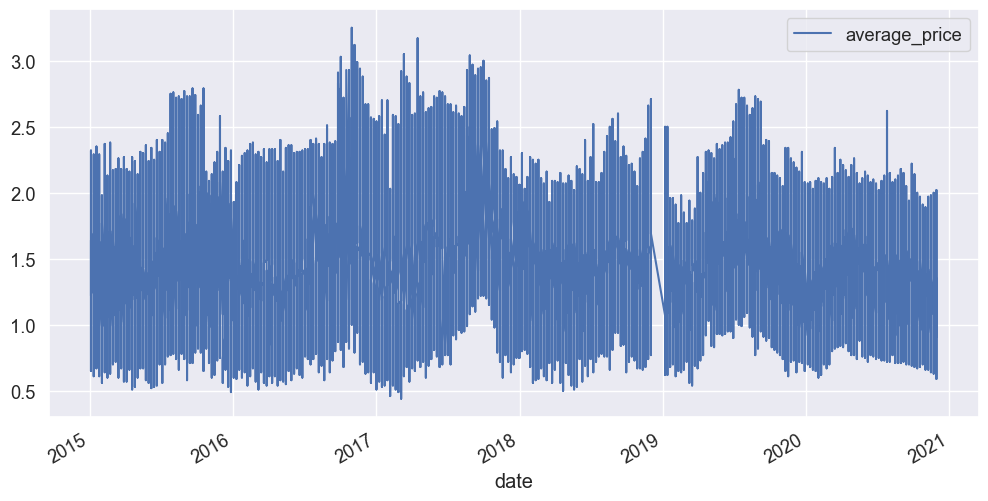

In [87]:
df.plot()

<Axes: xlabel='date'>

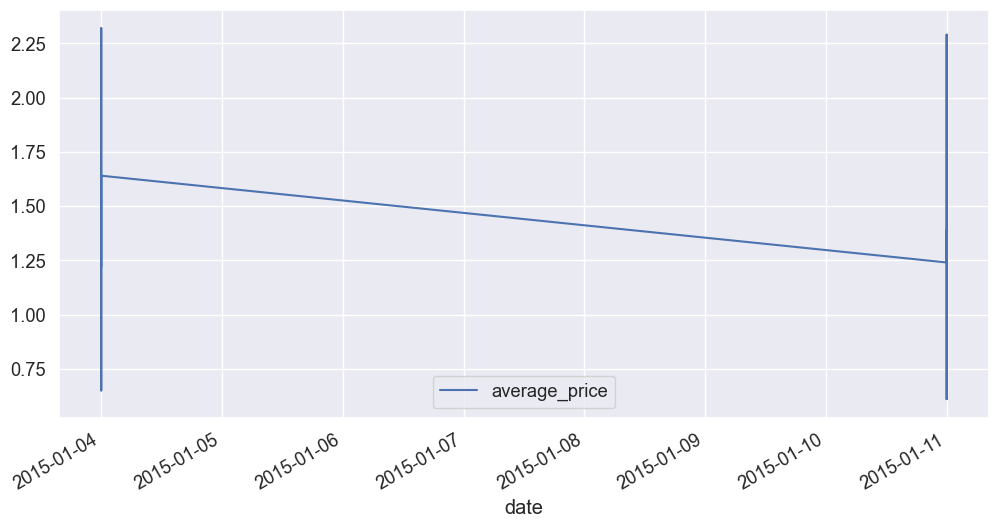

In [88]:
df[:200].plot()

# ADF Test

In [89]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['average_price'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Usd for ADF Regression andd critical values Calculation : ", dftest[3])
print("5. Critical Values : ",)
for key, val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -7.625736845817109
2. P-Value : 2.0711213788806855e-11
3. Num Of Lags :  51
4. Num Of Observations Usd for ADF Regression andd critical values Calculation :  32993
5. Critical Values : 
	 1% :  -3.4305482180719413
	 5% :  -2.8616276073217666
	 10% :  -2.566816630653147


In [90]:
# Converting p-value from Scientific to Decimal Notation

p_value = 2.0711213788806855e-11
print(f"p-value: {p_value:.15f}")


p-value: 0.000000000020711


In [91]:
# since p value < 0.05.
# It means is is stationary.

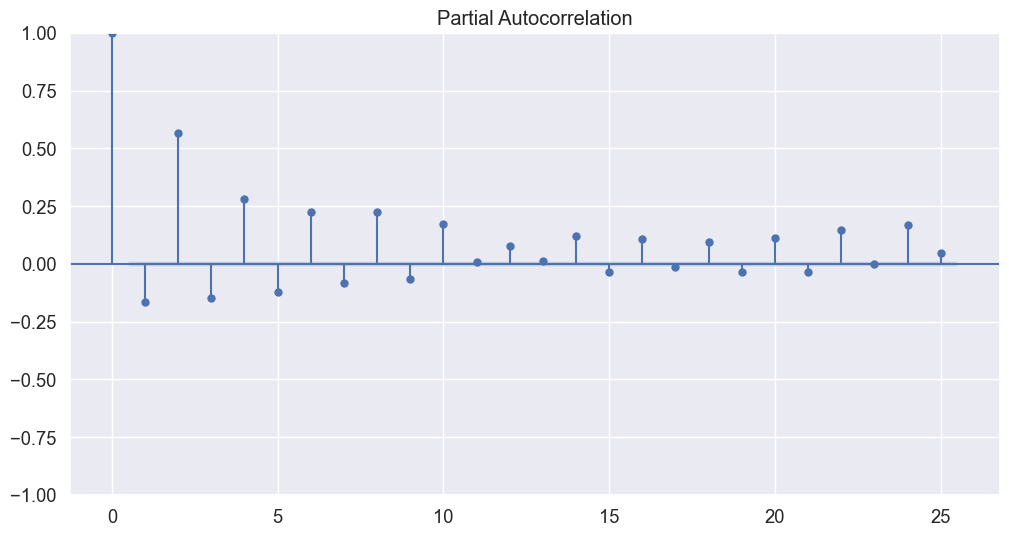

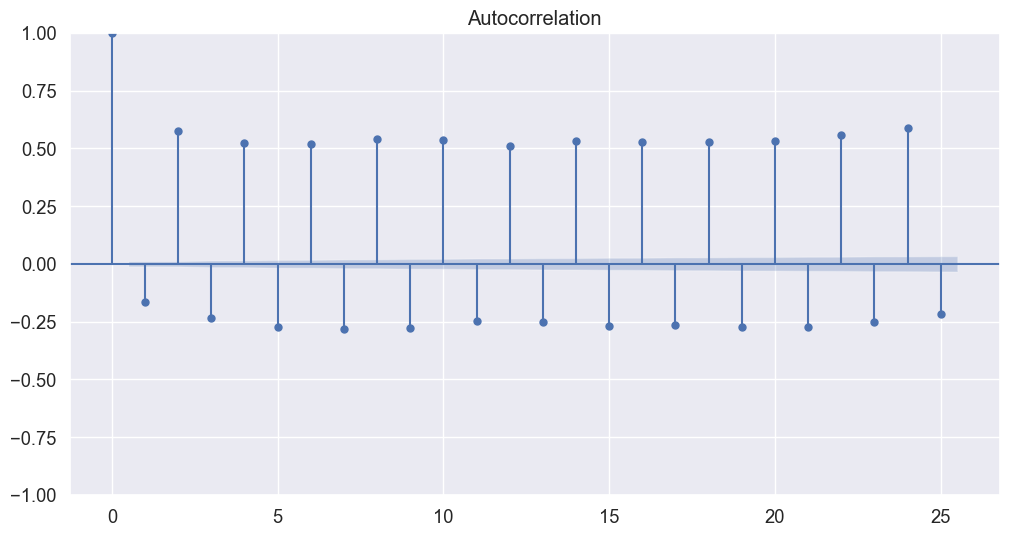

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf=plot_pacf(df['average_price'],lags=25)
acf=plot_acf(df['average_price'],lags=25)

In [96]:
# Explanation
# --------------------

# Partial correlation measures the direct relationship between two variables while controlling 
# for the effect of other variables, whereas autocorrelation measures 
# the correlation of a variable with its past values over time.

# Split Dataset into Train and Test Testing: Last 7 days

In [93]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [94]:
print(train)
print(test)

[[1.22]
 [1.79]
 [1.  ]
 ...
 [0.95]
 [1.46]
 [0.65]]
[[0.95]
 [0.89]
 [1.47]
 [0.91]
 [1.48]
 [0.67]
 [1.35]]


In [95]:
model=AutoReg(train,lags=10)

In [97]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                33038
Model:                    AutoReg(10)   Log Likelihood               -3643.556
Method:               Conditional MLE   S.D. of innovations              0.270
Date:                Thu, 10 Apr 2025   AIC                           7311.113
Time:                        01:16:36   BIC                           7411.974
Sample:                            10   HQIC                          7343.328
                                33038                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3725      0.012     30.906      0.000       0.349       0.396
y.L1           0.1774      0.005     32.721      0.000       0.167       0.188
y.L2           0.2022      0.005     36.877      0.0

In [98]:
# 0.05 < lag value 
# then significant

In [99]:
print(len(train))
print(len(test))

33038
7


# Make Predictioned on Test Set and Compare

In [100]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [101]:
print(len(pred))

7


In [102]:
print(len(test))

7


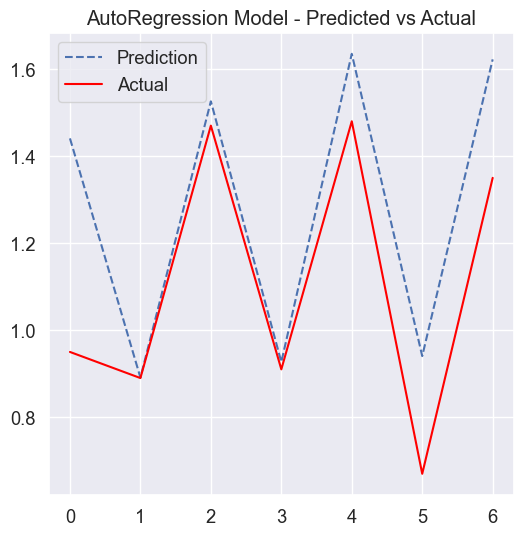

[1.44066359 0.8910434  1.52578697 0.92691925 1.6350273  0.94047644
 1.62223094]


In [103]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(6,6))
plt.plot(pred, label='Prediction', linestyle='dashed')
plt.plot(test, label='Actual', linestyle='solid', color='red')
plt.legend()
plt.title('AutoRegression Model - Predicted vs Actual')
plt.show() 

# Print predicted values
print(pred)

In [104]:
print(pred)

[1.44066359 0.8910434  1.52578697 0.92691925 1.6350273  0.94047644
 1.62223094]


In [105]:
print(test)

[[0.95]
 [0.89]
 [1.47]
 [0.91]
 [1.48]
 [0.67]
 [1.35]]


# Calculate Error

In [107]:
test.shape

(7, 1)

In [108]:
pred.shape

(7,)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

# Print error values
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 0.18030684076662076
MSE: 0.0593501350934943
RMSE: 0.2436188315658178


# Making Future Predictions

In [110]:
pred_future=model_fit.predict(start=len(X),end=len(X)+6,dynamic=False)

print("The Future prediction for the next week")
print(pred_future)
print("Number of Prediction Made:",len(pred_future))

The Future prediction for the next week
[0.9722878  1.58438377 0.9588652  1.57398654 0.99140347 1.59988353
 1.00817319]
Number of Prediction Made: 7


In [111]:
print('Number of Predictions Made:', len(pred_future))

Number of Predictions Made: 7


In [112]:
# Explanation
# -----------------

# dynamic=False When dynamic=False, the model uses actual past observations to make 
# each prediction. If dynamic=True, it would use its own previous predictions, which can 
# lead to more errors over time.